# Load packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#use the 700 p-adj genes then select same gene_id in TCGA dataset + 36 normal + 108 tumour
df = pd.read_csv('drive/MyDrive/BS6202/processed_144_DEG_sample.csv')

In [ ]:
df.shape

(10224, 11)

In [ ]:
71*144

10224

In [ ]:
df.columns

Index(['gene_id', 'gene_name', 'gene_type', 'unstranded', 'stranded_first',
       'stranded_second', 'tpm_unstranded', 'fpkm_unstranded',
       'fpkm_uq_unstranded', 'Sample_Type', 'File_ID'],
      dtype='object')

# Preprocess the data

In [ ]:
df.head()

,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded,Sample_Type,File_ID
0,ENSG00000011405.13,PIK3C2A,protein_coding,3258,1594,1667,16.8158,6.9908,9.6936,Solid Tissue Normal,01aeccaf-0178-43d7-8273-b0bf9eeacddb
1,ENSG00000065809.13,FAM107B,protein_coding,4541,2267,2274,30.7340,12.7770,17.7168,Solid Tissue Normal,01aeccaf-0178-43d7-8273-b0bf9eeacddb
2,ENSG00000071189.21,SNX13,protein_coding,1544,814,731,4.4675,1.8573,2.5753,Solid Tissue Normal,01aeccaf-0178-43d7-8273-b0bf9eeacddb
3,ENSG00000088833.17,NSFL1C,protein_coding,3397,1671,1727,24.7092,10.2723,14.2438,Solid Tissue Normal,01aeccaf-0178-43d7-8273-b0bf9eeacddb
4,ENSG00000095203.14,EPB41L4B,protein_coding,383,214,169,2.3092,0.9600,1.3312,Solid Tissue Normal,01aeccaf-0178-43d7-8273-b0bf9eeacddb


In [ ]:
df['gene_id'].value_counts()

ENSG00000011405.13    144
ENSG00000173230.15    144
ENSG00000185499.16    144
ENSG00000182670.13    144
ENSG00000177971.8     144
                     ... 
ENSG00000143776.18    144
ENSG00000138688.15    144
ENSG00000137145.20    144
ENSG00000136271.10    144
ENSG00000281344.1     144
Name: gene_id, Length: 71, dtype: int64

In [ ]:
wide_df = df.pivot_table(index='File_ID', columns='gene_id', values='fpkm_unstranded', aggfunc='first', fill_value=0)
wide_df.reset_index(inplace=True)

In [ ]:
wide_df.head()

gene_id,File_ID,ENSG00000011405.13,ENSG00000065809.13,ENSG00000071189.21,ENSG00000088833.17,ENSG00000095203.14,ENSG00000095319.14,ENSG00000099341.11,ENSG00000100815.12,ENSG00000101974.14,...,ENSG00000233966.1,ENSG00000254285.3,ENSG00000254986.7,ENSG00000256356.1,ENSG00000259820.1,ENSG00000263740.2,ENSG00000264462.1,ENSG00000265735.2,ENSG00000281026.1,ENSG00000281344.1
0,002cf74b-098b-4de6-9a76-0d889c894ab6,15.4201,13.4234,2.9419,15.1558,6.3758,15.9204,36.4223,6.7302,3.8592,...,1.4754,25.6042,19.7529,0.3817,0.7430,13.0270,0.0000,7.9949,0.3849,0.0147
1,01332795-f118-4e1a-b663-aa57c3fa68f9,9.2702,15.0733,2.4063,12.1400,2.1148,24.4982,60.5404,4.1202,3.2399,...,7.1742,43.4505,23.4303,0.6179,0.4894,5.6837,0.2329,1.8935,0.2872,0.0315
2,01aeccaf-0178-43d7-8273-b0bf9eeacddb,6.9908,12.7770,1.8573,10.2723,0.9600,12.5751,50.4322,3.4635,1.7998,...,0.8561,1.3357,8.5065,0.1909,0.3348,13.3893,0.0000,6.2755,0.1212,0.0051
3,02010693-bae6-4370-b10d-a16c480d1dd6,11.8943,8.4619,2.5694,12.8410,3.0925,16.7832,53.9733,3.5229,2.4941,...,3.6080,9.8441,10.7886,0.8911,2.8389,3.7690,0.0528,2.7828,0.9212,0.0723
4,0390dab8-28c2-466f-8d58-07870b2f0a49,14.2418,33.1812,3.4607,12.1448,2.5249,10.2579,47.4850,6.8609,4.0480,...,2.2708,4.2489,11.0979,0.6261,0.8491,54.0997,0.1777,32.7301,0.6475,0.0727


In [ ]:
wide_df.shape

(144, 72)

In [ ]:
pheno_type = df[['File_ID', 'Sample_Type']].drop_duplicates()

In [ ]:
pheno_type

,File_ID,Sample_Type
0,01aeccaf-0178-43d7-8273-b0bf9eeacddb,Solid Tissue Normal
71,07641b94-88bc-4aad-a266-5e1b84c099ff,Solid Tissue Normal
142,1591d97a-2d89-4dcb-a259-c8b40abe74a1,Solid Tissue Normal
213,18ac8921-f406-4872-88a2-8dd0f06b63b4,Solid Tissue Normal
284,26211ffe-ded4-449c-9212-5a2f44dcd30e,Solid Tissue Normal
...,...,...
9869,44f31170-d929-4854-bda7-100f1b42279a,Primary Tumor
9940,bd361c61-5017-43c7-81de-8775439c3872,Primary Tumor
10011,fb616214-ebce-4936-9544-e3fc5f5e7f50,Primary Tumor
10082,9ef848a2-b65c-4d02-9202-a2a60ce21f28,Primary Tumor


In [ ]:
merged_df = pheno_type.merge(wide_df, on='File_ID', how='inner')
merged_df

,File_ID,Sample_Type,ENSG00000011405.13,ENSG00000065809.13,ENSG00000071189.21,ENSG00000088833.17,ENSG00000095203.14,ENSG00000095319.14,ENSG00000099341.11,ENSG00000100815.12,...,ENSG00000233966.1,ENSG00000254285.3,ENSG00000254986.7,ENSG00000256356.1,ENSG00000259820.1,ENSG00000263740.2,ENSG00000264462.1,ENSG00000265735.2,ENSG00000281026.1,ENSG00000281344.1
0,01aeccaf-0178-43d7-8273-b0bf9eeacddb,Solid Tissue Normal,6.9908,12.7770,1.8573,10.2723,0.9600,12.5751,50.4322,3.4635,...,0.8561,1.3357,8.5065,0.1909,0.3348,13.3893,0.0000,6.2755,0.1212,0.0051
1,07641b94-88bc-4aad-a266-5e1b84c099ff,Solid Tissue Normal,6.7162,5.0406,1.5093,9.8555,15.0605,3.8149,65.1984,2.9512,...,0.3961,11.2711,16.5095,0.1601,0.3761,3.3689,0.3681,1.1352,0.1897,0.0058
2,1591d97a-2d89-4dcb-a259-c8b40abe74a1,Solid Tissue Normal,5.6462,26.6994,2.7029,6.3711,9.9679,0.8779,79.0115,2.8147,...,0.2651,18.6055,5.1020,0.2743,0.0511,6.0124,0.1971,1.5471,0.0508,0.0010
3,18ac8921-f406-4872-88a2-8dd0f06b63b4,Solid Tissue Normal,7.9996,5.4097,2.3898,11.1934,0.7008,10.4417,40.3227,5.0140,...,0.6455,0.3832,6.6236,0.0895,0.5574,1.7775,0.0000,0.6726,0.2208,0.0053
4,26211ffe-ded4-449c-9212-5a2f44dcd30e,Solid Tissue Normal,12.2543,4.3296,3.5528,10.2025,0.4914,12.5971,29.6958,8.1971,...,0.2387,0.3214,6.9487,0.2765,0.9299,1.4884,0.0000,0.8290,0.7047,0.0034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,44f31170-d929-4854-bda7-100f1b42279a,Primary Tumor,10.1865,21.4169,3.0954,8.4811,9.8155,10.6062,31.9245,5.2545,...,0.5872,13.8898,17.8918,0.1899,1.6208,4.3501,0.0000,3.1819,0.8917,0.0376
140,bd361c61-5017-43c7-81de-8775439c3872,Primary Tumor,14.9097,11.9788,1.4916,8.7398,7.0198,7.9101,91.0212,4.6823,...,4.5507,7.9187,11.6107,0.5217,0.9757,6.5374,0.4717,3.0606,0.5432,0.0816
141,fb616214-ebce-4936-9544-e3fc5f5e7f50,Primary Tumor,12.9583,14.6554,4.1723,10.9653,11.4861,16.0045,38.0176,4.1764,...,0.4708,24.7784,17.3461,0.6147,1.1584,1.4372,0.0000,1.0189,0.6069,0.0062
142,9ef848a2-b65c-4d02-9202-a2a60ce21f28,Primary Tumor,14.8889,21.0144,2.7740,10.8022,4.4059,15.6883,28.8811,6.9846,...,0.8672,4.3910,30.7666,0.0935,0.5722,4.5234,0.1074,2.4701,0.8028,0.0208


# Dimension reduction

### PCA

In [ ]:
pca_matrix=wide_df.drop(['File_ID'],axis=1)

In [ ]:
pca_matrix

gene_id,ENSG00000011405.13,ENSG00000065809.13,ENSG00000071189.21,ENSG00000088833.17,ENSG00000095203.14,ENSG00000095319.14,ENSG00000099341.11,ENSG00000100815.12,ENSG00000101974.14,ENSG00000104529.17,...,ENSG00000233966.1,ENSG00000254285.3,ENSG00000254986.7,ENSG00000256356.1,ENSG00000259820.1,ENSG00000263740.2,ENSG00000264462.1,ENSG00000265735.2,ENSG00000281026.1,ENSG00000281344.1
0,15.4201,13.4234,2.9419,15.1558,6.3758,15.9204,36.4223,6.7302,3.8592,5.4073,...,1.4754,25.6042,19.7529,0.3817,0.7430,13.0270,0.0000,7.9949,0.3849,0.0147
1,9.2702,15.0733,2.4063,12.1400,2.1148,24.4982,60.5404,4.1202,3.2399,7.2005,...,7.1742,43.4505,23.4303,0.6179,0.4894,5.6837,0.2329,1.8935,0.2872,0.0315
2,6.9908,12.7770,1.8573,10.2723,0.9600,12.5751,50.4322,3.4635,1.7998,3.0707,...,0.8561,1.3357,8.5065,0.1909,0.3348,13.3893,0.0000,6.2755,0.1212,0.0051
3,11.8943,8.4619,2.5694,12.8410,3.0925,16.7832,53.9733,3.5229,2.4941,16.5752,...,3.6080,9.8441,10.7886,0.8911,2.8389,3.7690,0.0528,2.7828,0.9212,0.0723
4,14.2418,33.1812,3.4607,12.1448,2.5249,10.2579,47.4850,6.8609,4.0480,11.0594,...,2.2708,4.2489,11.0979,0.6261,0.8491,54.0997,0.1777,32.7301,0.6475,0.0727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,8.7595,10.1085,4.1007,11.4077,2.0647,13.0295,99.8192,5.1499,2.4300,12.0175,...,3.8817,10.3102,10.6014,0.3318,1.2841,9.2583,1.3266,2.6967,0.8698,0.0534
140,7.1210,4.5578,3.3271,15.2697,16.4160,11.2160,32.4686,3.8030,2.9675,8.9055,...,1.8705,5.7197,9.7540,0.0964,3.4687,5.3484,0.0000,2.7118,0.4710,0.0149
141,9.1893,5.1655,2.9203,9.1868,0.7364,14.1338,32.5913,5.7040,1.8403,4.6019,...,0.4536,0.4105,7.2487,0.2053,0.9415,1.3167,0.0000,0.6050,0.6752,0.0139
142,6.2263,4.4639,3.4773,11.8250,6.2498,21.3966,43.0118,5.5935,3.2742,10.1335,...,1.7097,19.5248,18.6654,0.3989,1.7899,1.2270,0.0000,0.8119,0.5389,0.0103


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=71)
standardized_data = (pca_matrix - pca_matrix.mean()) / pca_matrix.std()
pca_result1 = pca.fit_transform(standardized_data)

In [ ]:
pca_result1.shape

(144, 71)

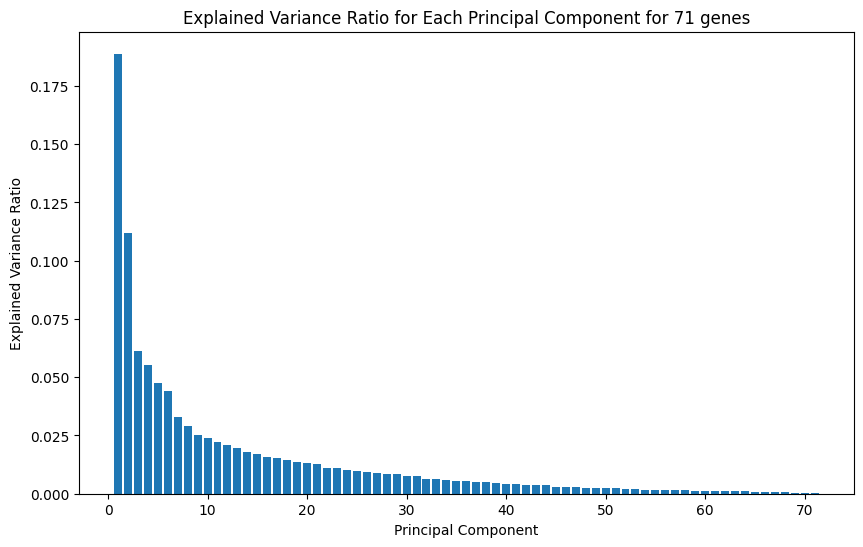

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component for 71 genes')
plt.show()

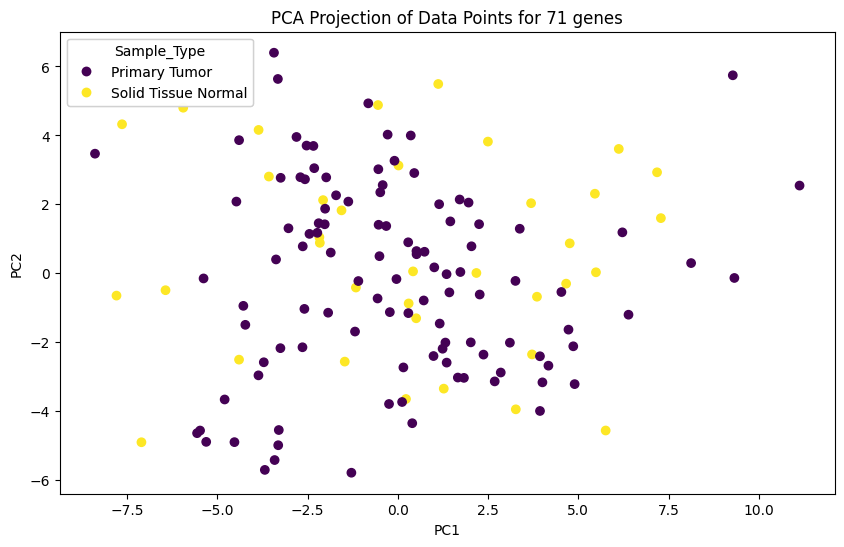

In [ ]:
pca = PCA(n_components=2)

# 执行 PCA
pca_result = pca.fit_transform(standardized_data)

# 获取每个主成分所解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 创建一个新 DataFrame，包括两个主成分和 Sample_Type 列
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Sample_Type'] = merged_df['Sample_Type']  # 假设 'Sample_Type' 列存在于 original_data 中


label_encoder = LabelEncoder()
pca_df['Sample_Type_Label'] = label_encoder.fit_transform(pca_df['Sample_Type'])


plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Sample_Type_Label'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of Data Points for 71 genes')


handles, labels = scatter.legend_elements()
legend = plt.legend(handles, label_encoder.classes_, title='Sample_Type')
plt.gca().add_artist(legend)

plt.show()


In [ ]:
pca_result.shape

(144, 2)

## TSNE

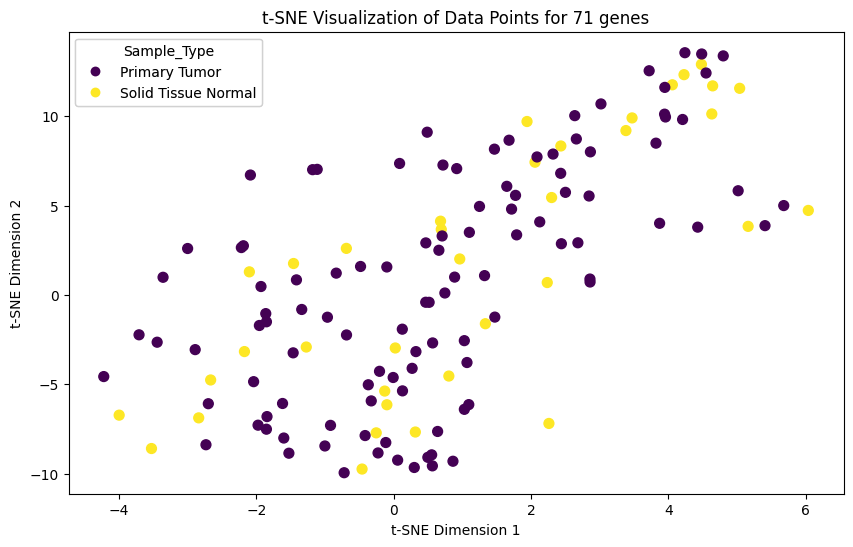

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
reduced_tsne = tsne.fit_transform(pca_matrix)

# 创建一个散点图
plt.figure(figsize=(10, 6))
plt.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], marker='o',s=50, c=pca_df['Sample_Type_Label'])

# 添加标题和坐标轴标签
plt.title('t-SNE Visualization of Data Points for 71 genes')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

handles, labels = scatter.legend_elements()
legend = plt.legend(handles, label_encoder.classes_, title='Sample_Type')
plt.gca().add_artist(legend)

# 显示图形
plt.show()

# Machine Learning Model

In [ ]:
# 分离特征（基因表达数据）和目标（Sample_Type）
X = merged_df.drop(['File_ID', 'Sample_Type'], axis=1)
y = merged_df['Sample_Type']  # 目标

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(random_state=2024)

log_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_grid_search = GridSearchCV(estimator=log_model, param_grid=log_param_grid, cv=5, scoring='accuracy')
log_grid_search.fit(X_train, y_train)
log_cv = log_grid_search.best_score_

print("Best Parameters: ", log_grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(log_grid_search.best_score_))

log_model = log_grid_search.best_estimator_
log_pred = log_model.predict(X_test)


log_test_accuracy = accuracy_score(y_test, log_pred)
print("Test Set Accuracy: {:.2f}".format(log_test_accuracy))

Best Parameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.98
Test Set Accuracy: 1.00


In [ ]:
coefficients = log_model.coef_[0]
absolute_coefficients = np.abs(coefficients)
log_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': absolute_coefficients})
log_importance = log_importance.sort_values(by='Importance', ascending=False)
id_to_name = log_importance
id_to_name.rename(columns={"Feature": "gene_id"}, inplace = True)
name = df[['gene_id','gene_type', 'gene_name']].drop_duplicates()
df_combined = id_to_name.merge(name, on='gene_id', how='inner')
df_combined.head(10)


,gene_id,Importance,gene_type,gene_name
0,ENSG00000175866.15,0.715874,protein_coding,BAIAP2
1,ENSG00000170373.8,0.483408,protein_coding,CST1
2,ENSG00000135114.12,0.421029,protein_coding,OASL
3,ENSG00000166669.13,0.379795,protein_coding,ATF7IP2
4,ENSG00000095203.14,0.339039,protein_coding,EPB41L4B
5,ENSG00000230551.4,0.323161,lncRNA,AC021078.1
6,ENSG00000173230.15,0.285458,protein_coding,GOLGB1
7,ENSG00000147251.15,0.208053,protein_coding,DOCK11
8,ENSG00000136271.10,0.202929,protein_coding,DDX56
9,ENSG00000119138.4,0.178801,protein_coding,KLF9


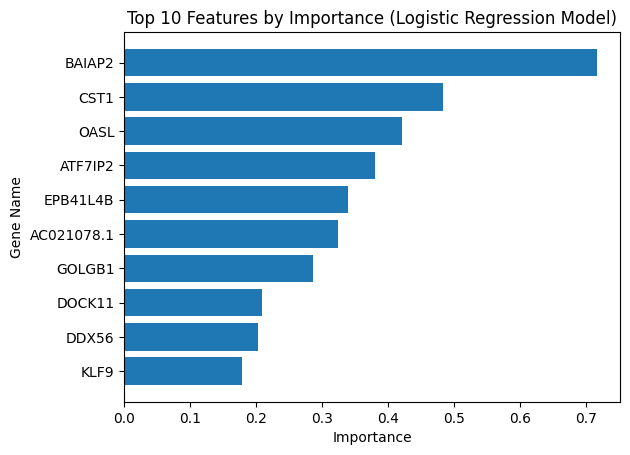

In [ ]:
svc_top10=df_combined.iloc[0:10,:]
plt.barh(svc_top10['gene_name'],svc_top10['Importance'])
plt.xlabel('Importance')
plt.ylabel('Gene Name')
plt.title('Top 10 Features by Importance (Logistic Regression Model)')
plt.gca().invert_yaxis()  # 反转Y轴，使最重要的特征位于顶部
plt.show()

In [ ]:
# 保存为CSV文件
import os
drive_path = 'drive/MyDrive/BS6202'  # Adjust the folder path

# Save the DataFrame to Google Drive
csv_file_name = "log_importance_DEG_sample.csv"
csv_file_path = os.path.join(drive_path, csv_file_name)

df_combined.to_csv(csv_file_path, index=False)

print(f"Saved df_combined to {csv_file_path} on Google Drive")

Saved df_combined to drive/MyDrive/BS6202/log_importance_DEG_sample.csv on Google Drive


## Support Vector Machine Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(random_state=2024)

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

svc_grid_search = GridSearchCV(estimator=svc_model, param_grid=svc_param_grid, cv=5, scoring='accuracy')
svc_grid_search.fit(X_train, y_train)
svc_cv = svc_grid_search.best_score_

print("Best Parameters: ", svc_grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(svc_grid_search.best_score_))

svc_model = svc_grid_search.best_estimator_
svc_pred = svc_model.predict(X_test)


svc_test_accuracy = accuracy_score(y_test, svc_pred)
print("Test Set Accuracy: {:.2f}".format(svc_test_accuracy))

Best Parameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.97
Test Set Accuracy: 1.00


In [ ]:
svc_importance=pd.DataFrame({'gene_id': X_train.columns, 'Importance':abs(svc_model.coef_[0])})
svc_importance = svc_importance.sort_values(by='Importance', ascending=False)

In [ ]:
name = df[['gene_id','gene_type', 'gene_name']].drop_duplicates()
df_combined = svc_importance.merge(name, on='gene_id', how='inner')

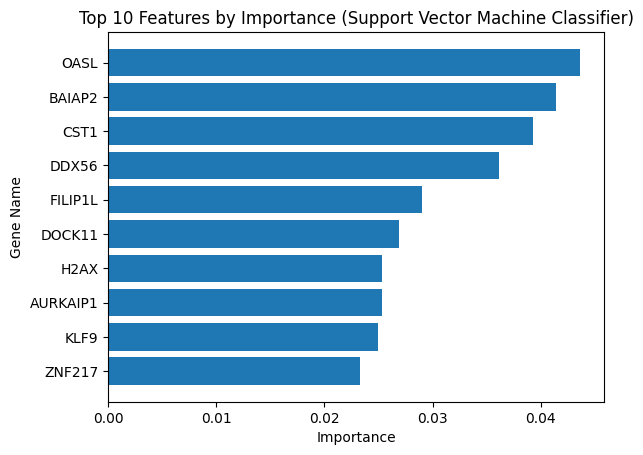

In [ ]:
svc_top10=df_combined.iloc[0:10,:]
plt.barh(svc_top10['gene_name'],svc_top10['Importance'])
plt.xlabel('Importance')
plt.ylabel('Gene Name')
plt.title('Top 10 Features by Importance (Support Vector Machine Classifier)')
plt.gca().invert_yaxis()  # 反转Y轴，使最重要的特征位于顶部
plt.show()

In [ ]:
# 保存为CSV文件
import os
drive_path = 'drive/MyDrive/BS6202'  # Adjust the folder path

# Save the DataFrame to Google Drive
csv_file_name = "svc_importance_DEG_sample.csv"
csv_file_path = os.path.join(drive_path, csv_file_name)

df_combined.to_csv(csv_file_path, index=False)

print(f"Saved df_combined to {csv_file_path} on Google Drive")

Saved df_combined to drive/MyDrive/BS6202/svc_importance_DEG_sample.csv on Google Drive


## Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=2024)

dt_param_grid = {
    'max_depth': [3, 4, 5, 6, 7],  # 不同的最大深度候选值
}


dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
dt_cv = dt_grid_search.best_score_

print("Best Parameters: ", dt_grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(dt_grid_search.best_score_))

dt_model = dt_grid_search.best_estimator_
dt_pred = dt_model.predict(X_test)


dt_test_accuracy = accuracy_score(y_test, dt_pred)
print("Test Set Accuracy: {:.2f}".format(dt_test_accuracy))

Best Parameters:  {'max_depth': 3}
Best Cross-Validation Score: 0.95
Test Set Accuracy: 0.86


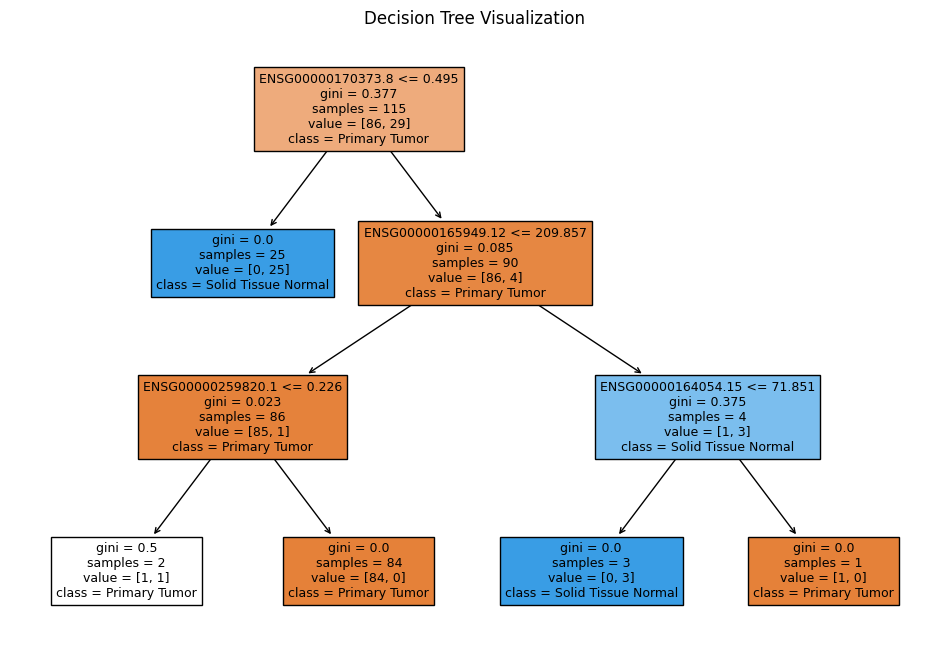

In [ ]:
# 可视化决策树
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=dt_model.classes_)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
dt_importance = dt_model.feature_importances_
feature_names = X_train.columns
dt_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_importance})
dt_importance_df = dt_importance_df.sort_values(by='Importance', ascending=False)
id_to_name = dt_importance_df
id_to_name.rename(columns={"Feature": "gene_id"}, inplace = True)
name = df[['gene_id','gene_type', 'gene_name']].drop_duplicates()
df_combined = id_to_name.merge(name, on='gene_id', how='inner')
df_combined.head(10)

,gene_id,Importance,gene_type,gene_name
0,ENSG00000170373.8,0.843195,protein_coding,CST1
1,ENSG00000165949.12,0.098355,protein_coding,IFI27
2,ENSG00000164054.15,0.035399,protein_coding,SHISA5
3,ENSG00000259820.1,0.023051,lncRNA,AC083843.2
4,ENSG00000173230.15,0.000000,protein_coding,GOLGB1
5,ENSG00000185499.16,0.000000,protein_coding,MUC1
6,ENSG00000182670.13,0.000000,protein_coding,TTC3
7,ENSG00000177971.8,0.000000,protein_coding,IMP3
8,ENSG00000175866.15,0.000000,protein_coding,BAIAP2
9,ENSG00000175756.13,0.000000,protein_coding,AURKAIP1


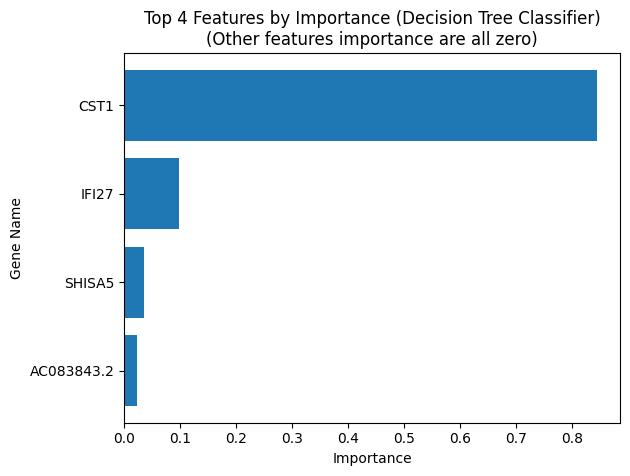

In [ ]:
dt_top10 = df_combined.iloc[0:4, :]
plt.barh(dt_top10['gene_name'], dt_top10['Importance'])
plt.xlabel('Importance')
plt.ylabel('Gene Name')
plt.title('Top 4 Features by Importance (Decision Tree Classifier)\n(Other features importance are all zero)')
plt.gca().invert_yaxis()  # 反转Y轴，使最重要的特征位于顶部
plt.show()

In [ ]:
# 保存为CSV文件
import os
drive_path = 'drive/MyDrive/BS6202'  # Adjust the folder path

# Save the DataFrame to Google Drive
csv_file_name = "dt_importance_DEG_sample.csv"
csv_file_path = os.path.join(drive_path, csv_file_name)

df_combined.to_csv(csv_file_path, index=False)

print(f"Saved df_combined to {csv_file_path} on Google Drive")

Saved df_combined to drive/MyDrive/BS6202/dt_importance_DEG_sample.csv on Google Drive


## Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=2024)

rf_param_grid = {
    'n_estimators': [50, 100, 150, 200]  # 可以根据需要调整n_estimators的取值
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
rf_cv = rf_grid_search.best_score_

print("Best Parameters: ", rf_grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(rf_grid_search.best_score_))

rf_model = rf_grid_search.best_estimator_
rf_pred = rf_model.predict(X_test)


rf_test_accuracy = accuracy_score(y_test, rf_pred)
print("Test Set Accuracy: {:.2f}".format(rf_test_accuracy))

Best Parameters:  {'n_estimators': 100}
Best Cross-Validation Score: 0.97
Test Set Accuracy: 0.90


In [ ]:
rf_importance = rf_model.feature_importances_
feature_names = X_train.columns
rf_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_importance})
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)

id_to_name = rf_importance
id_to_name.rename(columns={"Feature": "gene_id"}, inplace = True)
name = df[['gene_id','gene_type', 'gene_name']].drop_duplicates()
df_combined = id_to_name.merge(name, on='gene_id', how='inner')
df_combined.head(10)


,gene_id,Importance,gene_type,gene_name
0,ENSG00000170373.8,0.171351,protein_coding,CST1
1,ENSG00000281344.1,0.088787,lncRNA,HELLPAR
2,ENSG00000161888.11,0.071809,protein_coding,SPC24
3,ENSG00000095319.14,0.060329,protein_coding,NUP188
4,ENSG00000259820.1,0.046152,lncRNA,AC083843.2
5,ENSG00000136271.10,0.034251,protein_coding,DDX56
6,ENSG00000163611.11,0.033900,protein_coding,SPICE1
7,ENSG00000233966.1,0.031218,processed_pseudogene,UBE2SP1
8,ENSG00000171940.13,0.030152,protein_coding,ZNF217
9,ENSG00000281026.1,0.029383,lncRNA,N4BP2L2-IT2


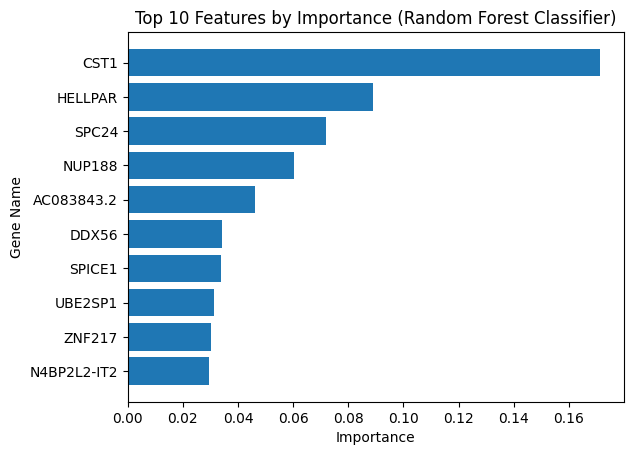

In [ ]:
rf_top10 = df_combined.iloc[0:10, :]
plt.barh(rf_top10['gene_name'], rf_top10['Importance'])
plt.xlabel('Importance')
plt.ylabel('Gene Name')
plt.title('Top 10 Features by Importance (Random Forest Classifier)')
plt.gca().invert_yaxis()  # 反转Y轴，使最重要的特征位于顶部
plt.show()

In [ ]:
# 保存为CSV文件
import os
drive_path = 'drive/MyDrive/BS6202'  # Adjust the folder path

# Save the DataFrame to Google Drive
csv_file_name = "rf_importance_DEG_sample.csv"
csv_file_path = os.path.join(drive_path, csv_file_name)

df_combined.to_csv(csv_file_path, index=False)

print(f"Saved df_combined to {csv_file_path} on Google Drive")

Saved df_combined to drive/MyDrive/BS6202/rf_importance_DEG_sample.csv on Google Drive


## StratifiedKFold evaluation

In [ ]:
X = X.values
y = y.values

# List of models to iterate through
models = [log_model, svc_model, dt_model, rf_model]

# Initialize StratifiedKFold with the number of splits (folds)
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for model in models:
    print(f"Model: {model.__class__.__name__}")
    accuracy_scores = []

    # Iterate over the folds
    for train_index, test_index in stratified_kfold.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Calculate the accuracy for this fold
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Print the accuracy scores for each fold
    for i, score in enumerate(accuracy_scores):
        print(f'Fold {i+1} Accuracy: {score:.2f}')

    # Calculate the mean accuracy and standard deviation
    mean_accuracy = sum(accuracy_scores) / n_splits
    std_deviation = (sum([(x - mean_accuracy) ** 2 for x in accuracy_scores]) / n_splits) ** 0.5

    print(f'Mean Accuracy: {mean_accuracy:.2f}')
    print(f'Standard Deviation: {std_deviation:.2f}')
    print()


Model: LogisticRegression
Fold 1 Accuracy: 1.00
Fold 2 Accuracy: 0.97
Fold 3 Accuracy: 1.00
Fold 4 Accuracy: 0.97
Fold 5 Accuracy: 1.00
Mean Accuracy: 0.99
Standard Deviation: 0.02

Model: SVC
Fold 1 Accuracy: 0.97
Fold 2 Accuracy: 0.90
Fold 3 Accuracy: 1.00
Fold 4 Accuracy: 0.93
Fold 5 Accuracy: 0.96
Mean Accuracy: 0.95
Standard Deviation: 0.04

Model: DecisionTreeClassifier
Fold 1 Accuracy: 0.93
Fold 2 Accuracy: 0.83
Fold 3 Accuracy: 0.93
Fold 4 Accuracy: 0.97
Fold 5 Accuracy: 0.96
Mean Accuracy: 0.92
Standard Deviation: 0.05

Model: RandomForestClassifier
Fold 1 Accuracy: 0.97
Fold 2 Accuracy: 0.97
Fold 3 Accuracy: 1.00
Fold 4 Accuracy: 1.00
Fold 5 Accuracy: 0.96
Mean Accuracy: 0.98
Standard Deviation: 0.02



In [ ]:
classifier_results = pd.DataFrame ({"Model": ["Logistic Regression Model", "Support Vector Machine Classifier", "Decision Tree Classifier", "Random Forest Classifier"],
                                    "Best Cross Validation Score": [log_cv, svc_cv, dt_cv, rf_cv],
                                    "Best Test Set Accuracy": [log_test_accuracy, svc_test_accuracy, dt_test_accuracy, rf_test_accuracy]})

In [ ]:
# Round the accuracy values to two decimal places for the specified columns
classifier_results["Best Cross Validation Score"] = classifier_results["Best Cross Validation Score"].round(2)
classifier_results["Best Test Set Accuracy"] = classifier_results["Best Test Set Accuracy"].round(2)

In [ ]:
classifier_results

,Model,Best Cross Validation Score,Best Test Set Accuracy
0,Logistic Regression Model,0.98,1.00
1,Support Vector Machine Classifier,0.97,1.00
2,Decision Tree Classifier,0.95,0.86
3,Random Forest Classifier,0.97,0.90


# Results analysis

In [ ]:
log_importance = pd.read_csv('drive/MyDrive/BS6202/log_importance_DEG_sample.csv')
svc_importance = pd.read_csv('drive/MyDrive/BS6202/svc_importance_DEG_sample.csv')
dt_importance = pd.read_csv('drive/MyDrive/BS6202/dt_importance_DEG_sample.csv')
rf_importance = pd.read_csv('drive/MyDrive/BS6202/rf_importance_DEG_sample.csv')

In [ ]:
# 合并数据框，按照 "gene_id" 列合并
merged_data = log_importance.merge(dt_importance, on='gene_id', suffixes=('_log', '_dt'))
merged_data = merged_data.merge(rf_importance, on='gene_id', suffixes=('', '_rf'))
merged_data = merged_data.merge(svc_importance, on='gene_id', suffixes=('', '_svc'))

In [ ]:
merged_data

,gene_id,Importance_log,gene_type_log,gene_name_log,Importance_dt,gene_type_dt,gene_name_dt,Importance,gene_type,gene_name,Importance_svc,gene_type_svc,gene_name_svc
0,ENSG00000175866.15,0.715874,protein_coding,BAIAP2,0.000000,protein_coding,BAIAP2,0.015330,protein_coding,BAIAP2,0.041373,protein_coding,BAIAP2
1,ENSG00000170373.8,0.483408,protein_coding,CST1,0.843195,protein_coding,CST1,0.171351,protein_coding,CST1,0.039310,protein_coding,CST1
2,ENSG00000135114.12,0.421029,protein_coding,OASL,0.000000,protein_coding,OASL,0.010706,protein_coding,OASL,0.043651,protein_coding,OASL
3,ENSG00000166669.13,0.379795,protein_coding,ATF7IP2,0.000000,protein_coding,ATF7IP2,0.007950,protein_coding,ATF7IP2,0.012845,protein_coding,ATF7IP2
4,ENSG00000095203.14,0.339039,protein_coding,EPB41L4B,0.000000,protein_coding,EPB41L4B,0.013067,protein_coding,EPB41L4B,0.018603,protein_coding,EPB41L4B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,ENSG00000137145.20,0.000000,protein_coding,DENND4C,0.000000,protein_coding,DENND4C,0.003690,protein_coding,DENND4C,0.009358,protein_coding,DENND4C
67,ENSG00000136169.16,0.000000,protein_coding,SETDB2,0.000000,protein_coding,SETDB2,0.002480,protein_coding,SETDB2,0.007086,protein_coding,SETDB2
68,ENSG00000177971.8,0.000000,protein_coding,IMP3,0.000000,protein_coding,IMP3,0.001960,protein_coding,IMP3,0.000960,protein_coding,IMP3
69,ENSG00000134326.11,0.000000,protein_coding,CMPK2,0.000000,protein_coding,CMPK2,0.003613,protein_coding,CMPK2,0.000315,protein_coding,CMPK2


In [ ]:
columns_to_drop = ['gene_type_log', 'gene_type_dt','gene_type_svc','gene_name_log','gene_name_dt','gene_name_svc']
merged_data.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
merged_data

,gene_id,Importance_log,Importance_dt,Importance,gene_type,gene_name,Importance_svc
0,ENSG00000175866.15,0.715874,0.000000,0.015330,protein_coding,BAIAP2,0.041373
1,ENSG00000170373.8,0.483408,0.843195,0.171351,protein_coding,CST1,0.039310
2,ENSG00000135114.12,0.421029,0.000000,0.010706,protein_coding,OASL,0.043651
3,ENSG00000166669.13,0.379795,0.000000,0.007950,protein_coding,ATF7IP2,0.012845
4,ENSG00000095203.14,0.339039,0.000000,0.013067,protein_coding,EPB41L4B,0.018603
...,...,...,...,...,...,...,...
66,ENSG00000137145.20,0.000000,0.000000,0.003690,protein_coding,DENND4C,0.009358
67,ENSG00000136169.16,0.000000,0.000000,0.002480,protein_coding,SETDB2,0.007086
68,ENSG00000177971.8,0.000000,0.000000,0.001960,protein_coding,IMP3,0.000960
69,ENSG00000134326.11,0.000000,0.000000,0.003613,protein_coding,CMPK2,0.000315


In [ ]:
merged_data.rename(columns={'Importance': 'Importance_rf'}, inplace=True)

In [ ]:
gene_name_column = merged_data['gene_name']
merged_data.drop(columns='gene_name', inplace=True)
merged_data.insert(1, 'gene_name', gene_name_column)

In [ ]:
gene_name_column = merged_data['gene_type']
merged_data.drop(columns='gene_type', inplace=True)
merged_data.insert(2, 'gene_type', gene_name_column)

In [ ]:
merged_data

,gene_id,gene_name,gene_type,Importance_log,Importance_dt,Importance_rf,Importance_svc
0,ENSG00000175866.15,BAIAP2,protein_coding,0.715874,0.000000,0.015330,0.041373
1,ENSG00000170373.8,CST1,protein_coding,0.483408,0.843195,0.171351,0.039310
2,ENSG00000135114.12,OASL,protein_coding,0.421029,0.000000,0.010706,0.043651
3,ENSG00000166669.13,ATF7IP2,protein_coding,0.379795,0.000000,0.007950,0.012845
4,ENSG00000095203.14,EPB41L4B,protein_coding,0.339039,0.000000,0.013067,0.018603
...,...,...,...,...,...,...,...
66,ENSG00000137145.20,DENND4C,protein_coding,0.000000,0.000000,0.003690,0.009358
67,ENSG00000136169.16,SETDB2,protein_coding,0.000000,0.000000,0.002480,0.007086
68,ENSG00000177971.8,IMP3,protein_coding,0.000000,0.000000,0.001960,0.000960
69,ENSG00000134326.11,CMPK2,protein_coding,0.000000,0.000000,0.003613,0.000315


In [ ]:
merged_data['mean_importance'] = merged_data.iloc[:, 3:8].mean(axis=1)

In [ ]:
merged_data = merged_data.sort_values(by='mean_importance', ascending=False)

In [ ]:
merged_data

,gene_id,gene_name,gene_type,Importance_log,Importance_dt,Importance_rf,Importance_svc,mean_importance
1,ENSG00000170373.8,CST1,protein_coding,0.483408,0.843195,0.171351,0.039310,0.384316
0,ENSG00000175866.15,BAIAP2,protein_coding,0.715874,0.000000,0.015330,0.041373,0.193144
2,ENSG00000135114.12,OASL,protein_coding,0.421029,0.000000,0.010706,0.043651,0.118847
3,ENSG00000166669.13,ATF7IP2,protein_coding,0.379795,0.000000,0.007950,0.012845,0.100147
4,ENSG00000095203.14,EPB41L4B,protein_coding,0.339039,0.000000,0.013067,0.018603,0.092677
...,...,...,...,...,...,...,...,...
64,ENSG00000138688.15,KIAA1109,protein_coding,0.000000,0.000000,0.001502,0.004030,0.001383
69,ENSG00000134326.11,CMPK2,protein_coding,0.000000,0.000000,0.003613,0.000315,0.000982
52,ENSG00000203811.1,H3C14,protein_coding,0.000000,0.000000,0.002892,0.000728,0.000905
47,ENSG00000256356.1,HSPA8P5,processed_pseudogene,0.000000,0.000000,0.002156,0.000841,0.000749


In [ ]:
# 保存为CSV文件
import os
drive_path = 'drive/MyDrive/BS6202'  # Adjust the folder path

# Save the DataFrame to Google Drive
csv_file_name = "mean_importance_DEG_sample.csv"
csv_file_path = os.path.join(drive_path, csv_file_name)

merged_data.to_csv(csv_file_path, index=False)

print(f"Saved df_combined to {csv_file_path} on Google Drive")

Saved df_combined to drive/MyDrive/BS6202/mean_importance_DEG_sample.csv on Google Drive


In [ ]:
name = df[['gene_id','gene_type', 'gene_name']].drop_duplicates()
name.drop('gene_type',axis=1,inplace=True)

In [ ]:
name_mapping = dict(zip(name['gene_id'], name['gene_name']))
pca_matrix = pca_matrix.rename(columns=name_mapping)

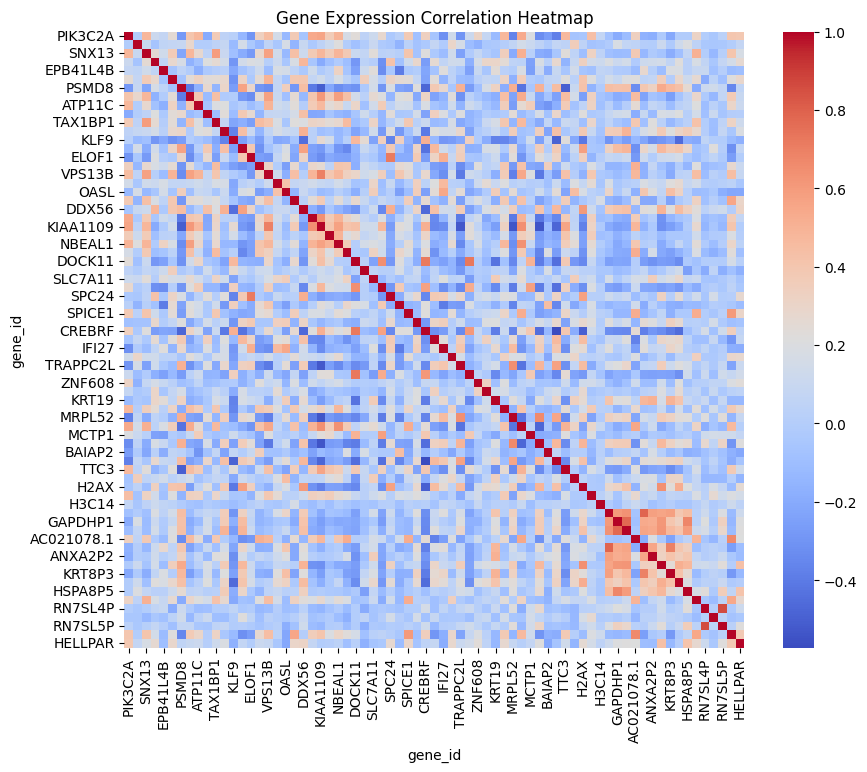

In [ ]:
correlation_matrix = pca_matrix.corr()

# 使用热图可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Gene Expression Correlation Heatmap")
plt.show()

In [ ]:
merged_data['gene_name']

1         CST1
0       BAIAP2
2         OASL
3      ATF7IP2
4     EPB41L4B
        ...   
64    KIAA1109
69       CMPK2
52       H3C14
47     HSPA8P5
68        IMP3
Name: gene_name, Length: 71, dtype: object

In [ ]:
new_column_order = merged_data['gene_name']
pca_matrix = pca_matrix.reindex(columns=new_column_order)

In [ ]:
pca_matrix

gene_name,CST1,BAIAP2,OASL,ATF7IP2,EPB41L4B,AC021078.1,GOLGB1,DDX56,DOCK11,ZNF217,...,TRIP11,USP53,EIF4A1P10,ZNF608,SNX13,KIAA1109,CMPK2,H3C14,HSPA8P5,IMP3
0,55.1186,5.4943,3.2406,0.7043,6.3758,1.6474,31.1013,18.4957,2.5809,17.1063,...,6.7302,5.0055,3.6798,1.6180,2.9419,4.0473,1.3644,0.0795,0.3817,10.5030
1,59.3187,7.1750,28.6282,1.2429,2.1148,0.7087,10.4820,23.2771,3.4365,9.7045,...,4.1202,1.8240,5.9291,0.3543,2.4063,3.2088,13.4414,0.1898,0.6179,7.9586
2,0.2718,15.0711,1.2354,0.7725,0.9600,1.5230,10.3798,9.2969,1.3723,9.3874,...,3.4635,4.2011,3.6867,1.6919,1.8573,2.4544,1.0329,0.3101,0.1909,5.2357
3,160.9858,3.4048,1.5537,3.8780,3.0925,1.3293,7.6954,37.9026,0.5062,11.1897,...,3.5229,3.5118,1.3207,1.3303,2.5694,2.0668,1.4756,0.0344,0.8911,11.1851
4,3.4477,2.3067,2.2825,1.1335,2.5249,1.6888,12.2513,20.1701,4.7015,11.0344,...,6.8609,2.7781,2.1962,1.9498,3.4607,4.0279,3.8919,0.1352,0.6261,6.3405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,105.6872,2.7940,20.7170,1.8238,2.0647,1.5001,11.5711,19.3234,5.0052,11.3582,...,5.1499,4.7409,1.6078,0.7848,4.1007,2.5037,15.7572,0.0901,0.3318,5.6382
140,196.4741,7.2803,7.8688,0.1334,16.4160,0.8526,8.0413,23.1775,6.8025,6.2613,...,3.8030,3.4283,0.7606,1.1004,3.3271,1.5035,8.5070,0.0329,0.0964,6.9784
141,0.0278,15.6836,0.4728,0.7901,0.7364,4.4401,16.1893,9.6497,1.4755,8.8449,...,5.7040,9.7989,1.6870,2.1657,2.9203,4.5600,0.4825,0.2712,0.2053,5.8774
142,81.1936,1.9506,3.9068,2.0639,6.2498,1.6061,15.6209,21.5472,2.4989,8.0252,...,5.5935,5.5770,2.7862,2.8154,3.4773,3.7191,4.9407,0.0262,0.3989,9.8387


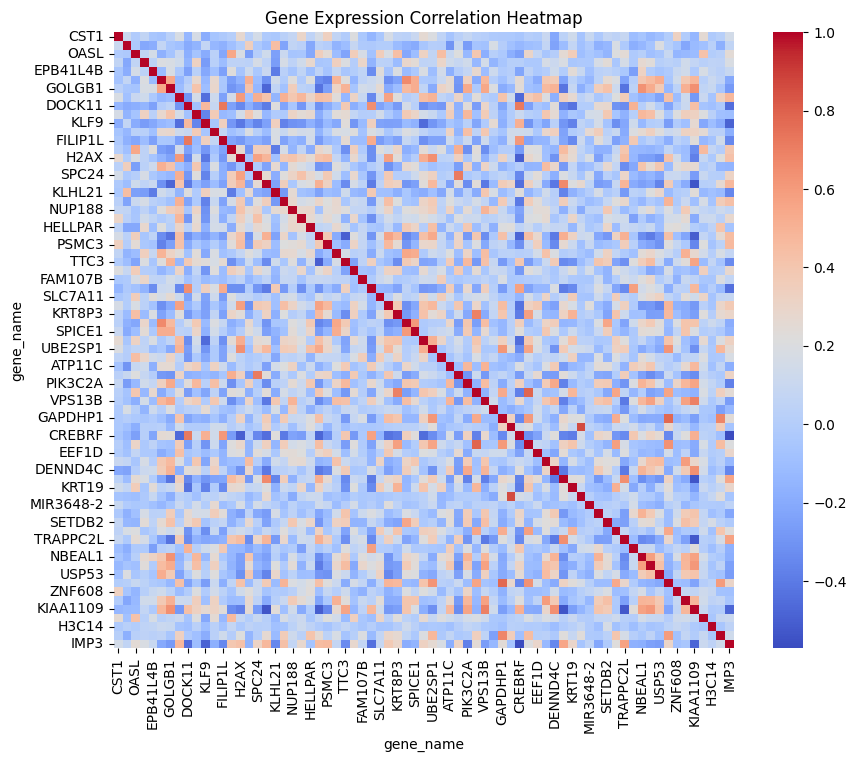

In [ ]:
correlation_matrix = pca_matrix.corr()

# 使用热图可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Gene Expression Correlation Heatmap")
plt.show()

In [ ]:
high_correlation_pairs = []
threshold = 0.6

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

In [ ]:
high_correlation_pairs

[('AC021078.1', 'N4BP2L2-IT2'),
 ('GOLGB1', 'NBEAL1'),
 ('GOLGB1', 'KIAA1109'),
 ('DDX56', 'H2AX'),
 ('DOCK11', 'FILIP1L'),
 ('DOCK11', 'UTRN'),
 ('DOCK11', 'CREBRF'),
 ('FILIP1L', 'CREBRF'),
 ('H2AX', 'UBE2SP1'),
 ('SPC24', 'ELOF1'),
 ('AURKAIP1', 'MRPL52'),
 ('KRT8P3', 'KRT8P10'),
 ('N4BP2L2-IT2', 'SPICE1'),
 ('UBE2SP1', 'GAPDHP1'),
 ('UBE2SP1', 'EIF4A1P10'),
 ('KRT8P10', 'KRT18P17'),
 ('VPS13B', 'KIAA1109'),
 ('GAPDHP1', 'KRT18P17'),
 ('GAPDHP1', 'EIF4A1P10'),
 ('GAPDHP1', 'HSPA8P5'),
 ('RN7SL5P', 'RN7SL4P'),
 ('KRT18P17', 'EIF4A1P10'),
 ('DENND4C', 'KIAA1109'),
 ('MRPL52', 'TRAPPC2L'),
 ('TRIP11', 'KIAA1109')]

In [ ]:
merged_data['gene_name'].iloc[0:10]

1           CST1
0         BAIAP2
2           OASL
3        ATF7IP2
4       EPB41L4B
5     AC021078.1
6         GOLGB1
8          DDX56
7         DOCK11
10        ZNF217
Name: gene_name, dtype: object

In [ ]:
top_20_genes = merged_data['gene_name'].iloc[0:20].tolist()

# 遍历 high_correlation_pairs 列表，筛选包含在 top_10_genes 中的基因对
filtered_pairs = [pair for pair in high_correlation_pairs if all(gene in top_20_genes for gene in pair)]

# 打印筛选后的基因对
for gene_pair in filtered_pairs:
    print("Highly correlated genes in top 20:", gene_pair)


Highly correlated genes in top 20: ('DDX56', 'H2AX')
Highly correlated genes in top 20: ('DOCK11', 'FILIP1L')
